 ##### Proyecto Integrador Unicorn Academy 

# <center> Expansión Internacional de  BeingSecureInsure

### Integrado por:

* Yindriska Medina  
* Mariana Di Gennaro
  
Julio 2025 - Edición 9.0

## <center>Objetivo

Este Notebook corresponde al desarrollo del proyecto integrador para **BeingSecureInsure**, una empresa dedicada a la protección y bienestar de las personas a través de seguros de salud.

El objetivo principal de este análisis es **identificar los países y regiones con mayor potencial para la expansión estratégica de BeingSecure Insure**, utilizando variables demográficas y económicas clave. El estudio busca destacar los mercados que combinan tamaño poblacional, desarrollo económico, capacidad adquisitiva y necesidades en salud, facilitando así la toma de decisiones estratégicas para la compañía.

Para alcanzar este objetivo, se utilizarán herramientas profesionales de análisis de datos como **Python** y **MySQL Workbench**, realizando consultas, procesamiento y visualización de la información para extraer insights accionables.


## <center>Metodología

- Recolección de datos de población, urbanización, poder adquisitivo (GNP per cápita), esperanza de vida y estabilidad económica por país.
- Análisis exploratorio y descriptivo de cada variable.
- Selección de los países que más destacan en cada ranking.
- Cruce de resultados para identificar los mercados que reúnen la mayor cantidad de atributos favorables.
- Recomendación de los países prioritarios para la expansión del negocio.


## <center>Justificación de variables analizadas

- **Población:** Mayor número de habitantes implica más potenciales asegurados.
- **Proporción urbana:** En zonas urbanas suele haber mejor infraestructura de salud y mayor conciencia aseguradora.
- **GNP per cápita:** Indica la capacidad adquisitiva y la viabilidad comercial de los productos de seguros.
- **Esperanza de vida:** Relacionada con la calidad y necesidad de servicios de salud; mercados con baja esperanza pueden requerir coberturas específicas.
- **Estabilidad económica:** Un entorno estable favorece la inversión y la permanencia de las aseguradoras en el tiempo.


## <center>Preguntas que guían el análisis

1. ¿Cuáles son los países más poblados por continente?
2. ¿Dónde hay mayor concentración urbana?
3. ¿Qué países presentan mayor poder adquisitivo?
4. ¿Dónde se observa la mayor o menor esperanza de vida?
5. ¿Cuáles muestran mayor estabilidad económica?
6. ¿En qué ciudades existen los mayores núcleos urbanos para posibles estrategias piloto?
7. ¿Dónde existe alta capacidad adquisitiva y baja esperanza de vida como oportunidad de impacto?
8. ¿Qué países presentan una alta diversidad lingüística y al mismo tiempo un alto GNP?
9. ¿Cuáles son los países con mayor potencial para la expansión?


### <CENTER>INGESTA DE DATOS:

1) - Importamos los Scripts de la BBDD en MySQL Workbech mendiante Data Import.
   -  Es necesario crear el Schema y luego importar cada script en la base de datos.


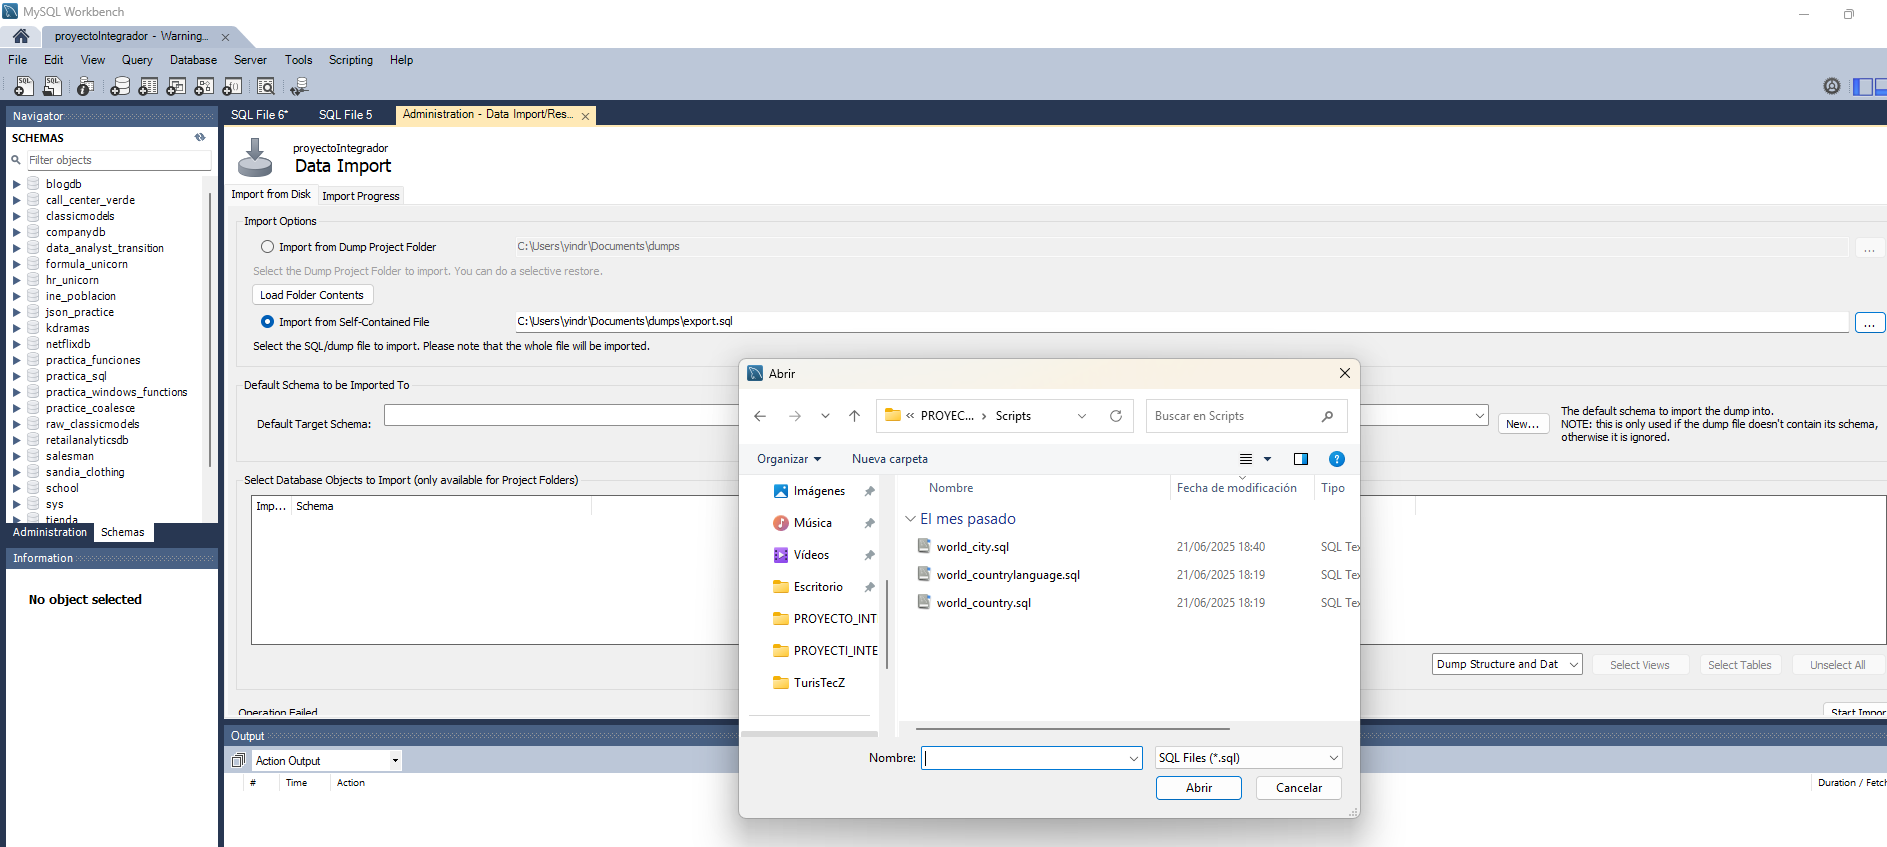

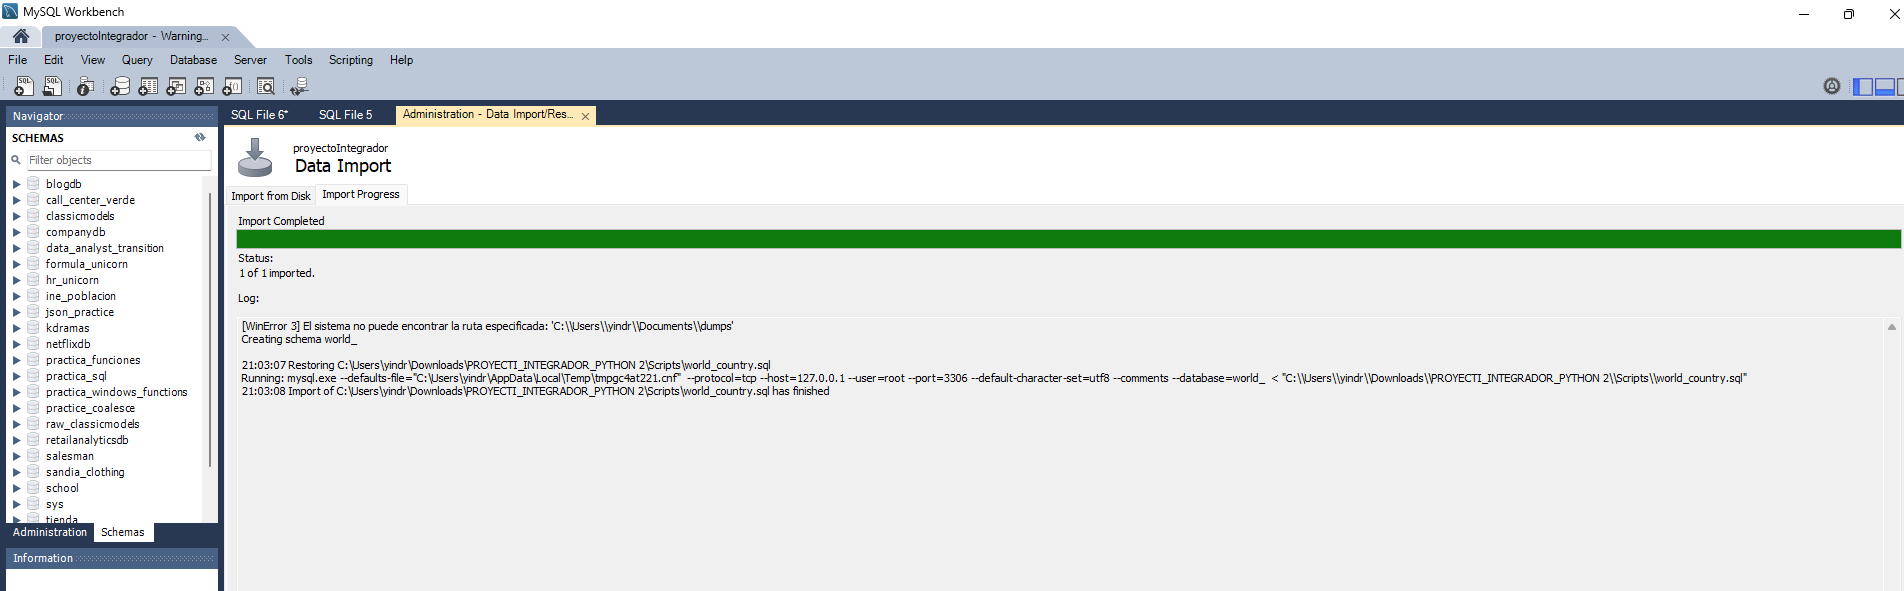

2) - Importamos las librerias que utilizaremos para la limpieza y visualización de datos:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


3) - Realizamos la conexión a la BBDD World en Mysql.  
Usamos la librería **sqlalchemy** y **python-dotenv** para generar las variables de conexión de forma más segura.

In [ ]:
# Importamos lo necesario
from sqlalchemy import create_engine, text
from dotenv import load_dotenv
import os

# Cargar variables desde .env
load_dotenv() ## Carga las variables del archivo .env creado en el ordenador.

#Es necesario crear un archivo .env en el ordenador con los valores de cada variable.
# Leer las variables
user = os.getenv("DB_USER") ## root
password = os.getenv("DB_PASSWORD") ## (contraseña de MySQL)
host = os.getenv("DB_HOST") ## localhost
database = os.getenv("DB_NAME") ## world

# CREAMOS LA URL DE CONEXIÓN 
connection_url = f'mysql+pymysql://{user}:{password}@{host}/{database}'

# CREAMOS EL MOTOR DE CONEXIÓN
engine = create_engine(connection_url)

# BLOQUE DE CONEXIÓN Y CONSULTA
try:
    # Usamos 'with' para que la conexión se cierre automáticamente
    with engine.connect() as connection:
        
        # Ejecutamos una consulta: ver tablas de la base de datos
        result = connection.execute(text("SHOW TABLES;"))
        
        print('Tablas disponibles en la base de datos:')
        for row in result:
            print('•', row[0])

except Exception as e:
    print(f'Error al conectar con MySQL: {e}')


#### <center> Diagrama del Modelo Entidad-Relación de la Base de datos 'World' </center>

 <div style="text-align: center; padding: 20px; border: 2px solid #007acc; border-radius: 10px;">
  <img src="attachment:e090311a-3487-4d0f-b82b-535217807db3.png" width="700px"/>
</div>


### <center> Exploración de la Base de Datos

#### <center> 1- Países con mayor población según continente (TOP 10).

In [ ]:
query_countries = """
SELECT Name Country, Population, Continent
FROM Country 
WHERE Continent IN ('Europe', 'Asia', 'Oceania', 'South America', 'North America')
ORDER BY Population DESC, Continent
LIMIT 10""";

topCountry = pd.read_sql(query_countries, engine)
topCountry

In [ ]:
fig = px.bar(
    topCountry,
    x='Country',
    y='Population',
    color='Population',
    color_continuous_scale='Blues_r', 
    text='Population',
    title='Población por País'
)
fig.update_coloraxes(showscale=False)
fig.update_layout(
    width=1100,
    height=600,
    title=dict(x=0.5, xanchor='center'),
    plot_bgcolor='#f8f9fa',
    paper_bgcolor='white',
    xaxis_tickangle=-45 
)

fig.update_traces(
    textposition='outside',  # Deja que Plotly elija mejor posición
    textfont_color='grey',
    textfont_size=13
)


fig.show()



Analizamos los países más poblados por continente para dimensionar el tamaño del mercado potencial para productos de seguros de salud.

**Insight:**  
Países con gran superficie y población, como **China**, **India** y **Estados Unidos**, representan mercados de enorme potencial debido a la alta concentración de habitantes. Estos mercados ofrecen oportunidades significativas para la expansión de servicios aseguradores, permitiendo alcanzar grandes volúmenes de clientes y diversificar la oferta de productos en función de las necesidades regionales.




#### <center> 2- Países con mayor proporción de población urbana

In [ ]:
query_urban = """
SELECT 
    c.Name AS Country,
    SUM(ct.Population) AS Urban_Population,
    c.Population AS Total_Population,
    ROUND(SUM(ct.Population) / c.Population * 100, 2) AS Urban_Percent
FROM country c
JOIN city ct ON ct.CountryCode = c.Code
GROUP BY c.Code
HAVING Urban_Percent IS NOT NULL
ORDER BY Urban_Percent DESC
LIMIT 10;
"""
top_urban = pd.read_sql(query_urban, engine)
top_urban

Una mayor proporción de población urbana puede facilitar la distribución de seguros de salud, así como la gestión y el acceso a servicios médicos.

**Insight:**   
Se detectó que los países con alta urbanización representan una ventaja operativa para la aseguradora. Estos entornos facilitan la implementación de servicios, permiten focalizar acciones comerciales en zonas densamente pobladas y ofrecen mayores oportunidades de establecer alianzas con clínicas, hospitales y empleadores.

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))

barplot = sns.barplot(
    data=top_urban,
    x='Country',
    y='Urban_Percent',
    hue='Country',
    palette='Blues',
    legend=False
)

plt.title('Top 10 países más urbanizados', fontsize=14)
plt.xlabel('País')
plt.ylabel(' % de población urbana')

for index, row in top_urban.iterrows():
    barplot.text(index, row['Urban_Percent'] + 0.5, f"{row['Urban_Percent']:.1f}%",
                 color='black', ha="center", fontsize=10)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


#### <center> 3- Países con mayor GNP per cápita

In [ ]:
query_gnp = """
SELECT Name AS Country, (GNP/Population) AS GNP_per_Capita, Population, GNP, Continent
FROM country
WHERE Population > 0 AND GNP IS NOT NULL
ORDER BY GNP_per_Capita DESC
LIMIT 10;
"""
top_gnp = pd.read_sql(query_gnp, engine)
top_gnp


In [ ]:
df = top_gnp.sort_values(by='GNP_per_Capita', ascending=False)
sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))


barplot = sns.barplot(data=df, x='Country', y='GNP_per_Capita', hue = 'Country',palette='Blues', legend=False)


plt.title('Top 10 países con mayor GNP per cápita', fontsize=14)
plt.xlabel('País')
plt.ylabel('GNP per cápita')


for index, row in df.iterrows():
    barplot.text(index, row['GNP_per_Capita'] + 0.0005, f"{row['GNP_per_Capita']:.3f}",
                 color='black', ha="center", fontsize=10)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


El poder adquisitivo de la población es clave para determinar la capacidad de pagar primas de seguros. El GNP per cápita es un buen indicador de esto.

**Insight:** 

Países con GNP per cápita elevado representan un entorno más favorable para ofrecer seguros con mayores coberturas o servicios diferenciados. Por el contrario, en países con GNP per cápita bajo, será clave diseñar productos más accesibles, con enfoque en volumen y posibles alianzas institucionales que ayuden a ampliar el alcance.

#### <center> 4- Países con mayor y menor esperanza de vida

#### 4.1- Países con mayor esperanza de vida

In [ ]:
query_life = """
SELECT Name AS Country, LifeExpectancy, Population, Continent
FROM country
WHERE LifeExpectancy IS NOT NULL
ORDER BY LifeExpectancy DESC
LIMIT 10;
"""
top_life = pd.read_sql(query_life, engine)
top_life


#### 4.2- Países con menor esperanza de vida

In [ ]:
query_life_low = """
SELECT Name AS Country, LifeExpectancy, Population, Continent
FROM country
WHERE LifeExpectancy IS NOT NULL
ORDER BY LifeExpectancy ASC
LIMIT 10;
"""
low_life = pd.read_sql(query_life_low, engine)
low_life


In [ ]:
combined = pd.concat([low_life, top_life])
combined = combined.sort_values('LifeExpectancy')
colors = ['skyblue'] * len(low_life) + ['steelblue'] * len(top_life)

plt.figure(figsize=(10, 6))
plt.barh(combined['Country'], combined['LifeExpectancy'], color=colors)
plt.xlabel('Esperanza de vida')
plt.title('Países con mayor y menor esperanza de vida')
plt.tight_layout()
plt.show()



La esperanza de vida puede indicar tanto el nivel de salud como los retos de cada país. Países con baja esperanza de vida pueden requerir productos de seguros específicos.


**Insights:** 

Países como **Andorra**, **Macao** y **San Marino**, con alta esperanza de vida, probablemente cuentan con buenos hospitales y servicios médicos avanzados. Son mercados donde la empresa puede ofrecer servicios especializados para el cuidado de personas mayores y mejorar la calidad de vida en etapas avanzadas.

En cambio, países como **Zambia**, **Mozambique** y **Malawi**, con baja esperanza de vida, tienen necesidades más urgentes en salud básica. En estos casos, se recomienda implementar servicios de atención primaria.

#### <center> 5- Estabilidad económica: menor brecha entre GNP y GNPOld

In [ ]:
query_gnp_var = """
SELECT Name AS Country, GNP, GNPOld, 
ROUND(ABS(GNP - GNPOld) / GNPOld * 100, 2) AS GNP_Variation
FROM country
WHERE GNP IS NOT NULL AND GNPOld IS NOT NULL
ORDER BY GNP DESC, GNP_Variation
LIMIT 10;
"""

gnp_var = pd.read_sql(query_gnp_var, engine)
gnp_var

In [ ]:
gnpComparative = gnp_var.melt(id_vars='Country', value_vars=['GNP', 'GNPOld'],
                        var_name='Tipo', value_name='Valor')
fig = px.line(
    gnpComparative,
    x='Country',
    y='Valor',
    color='Tipo',
    markers=True,
    color_discrete_sequence=['#1f77b4', '#6baed6']
)

fig.update_layout(
    title='Evolución comparativa: GNP vs GNPOld',
    width=1100,
    height=600,
    plot_bgcolor='#e9ecef',  
    paper_bgcolor='#f8f9fa',
    font=dict(
        size=13,
        color='#343a40'
    ),
    
)

fig.show()



La estabilidad económica es fundamental para inversiones de largo plazo como los seguros de salud. Una menor variación en el GNP es señal de un entorno económico más predecible.

**Insight:** 

Los países con baja variabilidad en el GNP ofrecen un entorno más estable para operaciones sostenidas en el tiempo. Esto permite a la empresa proyectar con mayor confianza sus ingresos, diseñar productos de largo plazo y establecer relaciones duraderas con clientes e instituciones locales.




#### <center> 6- ¿En qué países la capital representa el mayor porcentaje de la población total?

In [ ]:
query_biggest_capital= """
SELECT 
    c.name Country,
    ct.Name AS Capital,  
    ct.Population AS cityPopulation,
    ROUND((ct.Population / c.Population) * 100, 2) AS PorcentajeCapital
FROM country c
JOIN city ct ON c.Capital = ct.ID
WHERE ct.Population > 30000
ORDER BY PorcentajeCapital DESC
LIMIT 10;

"""

biggestCapital= pd.read_sql(query_biggest_capital, engine)
biggestCapital

In [ ]:

fig = go.Figure()

fig.add_trace(go.Bar(
    x=biggestCapital['Country'],
    y=biggestCapital['cityPopulation'],
    name='Población Capital',
    text=biggestCapital['cityPopulation'],
    textposition='outside',
    marker=dict(
        color=biggestCapital['PorcentajeCapital'],
        colorscale='Blues',
        showscale=True  
    )
))

fig.update_layout(
    title='Población de las Capitales Más Pobladas',
    xaxis_title='País',
    yaxis_title='Población en la Capital',
    width=1000,
    height=600,
    plot_bgcolor='#f8f9fa',
    paper_bgcolor='#f8f9fa'
)

fig.show()


Las ciudades más grandes pueden ser el punto de partida para una estrategia piloto o campañas focalizadas de seguros de salud.

Se estableció un umbral mínimo de **25.000 habitantes** para la población de las capitales con el objetivo de:

1. **Excluir microestados o capitales simbólicas** con una población muy reducida que podrían sesgar el análisis (por ejemplo, países con menos de 10.000 habitantes).
2. **Centrarse en capitales con una estructura urbana significativa**, que representan núcleos activos en términos económicos, administrativos y de servicios.
3. **Evitar distorsiones estadísticas**: en países muy pequeños, es común que la capital tenga una proporción desproporcionada de la población total, lo que puede inflar los valores de porcentaje y ocultar patrones reales en países más grandes.


**Insight:** 

Se identifico que las ciudades más grandes pueden funcionar como puntos estratégicos para lanzar programas piloto o campañas focalizadas. Esto permite validar la propuesta de valor, medir resultados rápidamente y ajustar la estrategia antes de escalar a nivel nacional.



### Países con baja esperanza de vida pero alto GNP

In [ ]:
query_special = """
SELECT Name AS Country, GNP, LifeExpectancy
FROM country
WHERE GNP > (SELECT AVG(GNP) FROM country)
  AND LifeExpectancy < (SELECT AVG(LifeExpectancy) FROM country);
"""
special_countries = pd.read_sql(query_special, engine)
special_countries


Países con alto GNP y baja esperanza de vida pueden ser mercados de alto impacto donde los seguros de salud pueden cubrir necesidades importantes no satisfechas.

**Insight:** 

En relación, los países con alto GNP y baja esperanza de vida representan oportunidades de alto impacto. En estos mercados, los seguros de salud pueden posicionarse como soluciones clave para cerrar brechas en el acceso a atención médica, aprovechando la capacidad de pago existente y cubriendo necesidades aún insatisfechas.

#### <center> ¿Qué países presentan una alta diversidad lingüística y al mismo tiempo un alto GNP?

In [ ]:
query_gnp_multi_ct= """

SELECT c.Name Country, COUNT(cl.Language) Languages, c.GNP
FROM country c
JOIN countrylanguage cl ON c.Code = cl.CountryCode
WHERE cl.IsOfficial = 'T'
GROUP BY c.Name, c.GNP
HAVING Languages > 1 AND c.GNP > (SELECT AVG(GNP) FROM country)
ORDER BY c.GNP DESC;
"""

top_gnp_multilingual_countries= pd.read_sql(query_gnp_multi_ct, engine)
top_gnp_multilingual_countries

In [ ]:
fig = px.pie(
    top_gnp_multilingual_countries,
    names='Country',
    values='GNP',
    title='Distribución del GNP entre países con alta diversidad lingüística',
    color_discrete_sequence=px.colors.sequential.Blues_r  # escala de azules
)

fig.update_traces(textinfo='percent+label', pull=[0.05]*len(top_gnp_multilingual_countries))

fig.update_layout(
    height=600,
    width=800,
    showlegend=False,
    title_x=0.5,
    paper_bgcolor='#f8f9fa'
)

fig.show()


Países como **Canada**, **Switzerland** y **Bélgica** combinan una alta diversidad lingüística con un elevado GNP, lo que indica no solo capacidad económica, sino también una población multicultural y diversa. Este escenario presenta oportunidades y desafíos particulares para el sector salud

**Insight:** 

En países con alta diversidad lingüística y alto GNP, es clave adaptar los servicios de salud y comunicación para diferentes grupos culturales. Se identificó que estos mercados requieren estrategias multilingües y culturalmente inclusivas, lo que puede mejorar el alcance, la confianza y la efectividad de las campañas. A su vez, el alto poder adquisitivo ofrece capacidad de inversión en soluciones tecnológicas y personalizadas, como atención multicanal o seguros adaptados por perfil sociocultural.

### <center> Países con mayor potencial para la expansión

In [ ]:
all_countries = pd.concat([
    topCountry['Country'],
    top_gnp['Country'],
    top_urban['Country'],
    top_life['Country'],
    biggestCapital['Country']
])

ranking_counts = all_countries.value_counts().reset_index()
ranking_counts.columns = ['Country', 'Coincidencias']
ranking_counts = ranking_counts.sort_values('Coincidencias', ascending=False)

top_finalistas = ranking_counts.head(5)
display(top_finalistas)


In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 5))
sns.barplot(data=top_finalistas, x='Coincidencias', y='Country', palette='Blues_d')

plt.title('Países con mayor presencia en variables clave', fontsize=14)
plt.xlabel('Número de Coincidencias')
plt.ylabel('País')

for i, v in enumerate(top_finalistas['Coincidencias']):
    plt.text(v + 0.1, i, str(v), color='black', va='center')

plt.tight_layout()
plt.show()



El análisis muestra que los países con mayor coincidencia en variables estratégicas para la expansión de BeingSecureInsure son:

1. **Macao**

2. **Singapur**

3. **Japón**

Estos tres países coinciden en al menos tres de las variables clave analizadas: población, GNP per cápita, urbanización, esperanza de vida y tamaño de capital.
Cada uno de ellos presenta ventajas particulares:

**Macao:** economía fuerte y entorno urbano muy concentrado, ideal para pruebas piloto.

**Singapur:** ciudad-estado con infraestructura tecnológica avanzada, entorno regulatorio claro y poder adquisitivo alto.

**Japón:** mercado amplio con población longeva y cultura digital, lo que lo convierte en un entorno ideal para productos de salud innovadores.

Se recomienda profundizar en las variables sanitarias y regulatorias específicas de cada país antes de tomar una decisión definitiva de entrada.


## <center> Limitaciones del análisis y validación con datos actuales

Es importante tener en cuenta que el dataset utilizado para este análisis proviene de fuentes oficiales recopiladas entre los años **2006 y 2009**. Si bien permite obtener una visión general y realizar comparaciones exploratorias entre países, no captura muchas de las dinámicas recientes que son especialmente relevantes para una empresa de salud en expansión, como por ejemplo:

- Cambios demográficos actuales  
- Procesos de urbanización acelerada  
- Tendencias migratorias recientes  
- Transformaciones políticas y económicas posteriores  

Por tanto, los resultados deben interpretarse como una base preliminar, útil para explorar hipótesis iniciales, pero que requiere ser contrastada con información más reciente antes de tomar decisiones estratégicas definitivas.

Con el fin de mitigar esta limitación y reforzar la validez del análisis, se ha contrastado el ranking original con estadísticas actualizadas provenientes de **World Bank**, **Worldometers** y **FRED** (Federal Reserve Economic Data), correspondientes a los años **2024–2025**.



## <center> Actualización de datos y ranking estratégico (2025)

A continuación, se presentan algunos indicadores clave actualizados para los países finalistas:

| País             | Población (2025 estimada) | GNP per cápita (USD) | Esperanza de vida (años) |
|------------------|----------------------------|------------------------|---------------------------|
| Estados Unidos   | 340 millones               | 85,809                 | 79.1                      |
| Suiza            | 8.9 millones               | 89,783                 | 84.1                      |
| Singapur         | 6 millones                 | 67,707                 | 83.6                      |
| Japón            | 123 millones               | 32,475                 | 84.8                      |
| Macao            | 722,000                    | 73,047                 | 85.2                      |

Los resultados muestran que los países identificados inicialmente siguen siendo atractivos en términos de ingreso per cápita y longevidad, aunque con algunas matizaciones. **Macao**, por ejemplo, destaca por su urbanización y renta, pero su escasa población lo convierte en una **opción nicho para pruebas piloto** más que en un mercado de gran escala.



## <center> Reformulación del ranking estratégico

Teniendo en cuenta estos datos actualizados, el ranking recomendado queda de la siguiente manera:

1. **Estados Unidos** - Gran mercado, alto ingreso, madurez en seguros  
2. **Suiza** - Estabilidad, alto poder adquisitivo, entorno multilingüe  
3. **Japón** - Población Longeva y cultura tecnológica.  
4. **Singapur** - Ciudad-estado digitalizada, ideal para MVP  
5. **Macao** - Mercado reducido pero ideal para prueba de concepto



Además de la antigüedad del dataset base, se reconoce la ausencia de variables estratégicas que deben incluirse en futuros análisis, tales como:

- Gasto sanitario per cápita  
- Nivel de aseguramiento privado  
- Regulaciones específicas por país  
- Acceso a sanidad pública  

Estas variables serán clave para estudios más avanzados y, sobre todo, *para definir un plan de expansión adaptado al perfil de cada país*. Además, resultan fundamentales a la hora de decidir qué productos o servicios ofrecer, permitiendo personalizar la propuesta de valor en función del entorno sanitario, regulatorio y económico de cada mercado.



## <center> Recomendaciones estratégicas

1. **Segmentar la oferta** según urbanización y esperanza de vida (ej. seguros preventivos en países longevos).  
2. **Adaptar la comunicación y servicios** en países multilingües y culturalmente diversos (ej. Suiza, Canadá).  
3. **Lanzar pilotos en mercados urbanos y controlables**, como Singapur o Macao, antes de escalar.  
4. **Establecer alianzas locales** para mitigar riesgos regulatorios y acelerar la entrada a mercados grandes.


## <center> Conclusión Final

El análisis actualizado respalda la validez general del ranking original. A pesar de utilizar datos históricos como punto de partida, la integración de fuentes actuales permite confirmar que los países seleccionados siguen siendo estratégicamente viables para la expansión internacional de BeingSecureInsure, siempre que se realice una adaptación contextual y gradual del modelo de negocio.

